# Aufgabe 9
### a)
Transformationsmethode für Neutrinofluss proportional zu $E^{-2,7}$:  
* Normierung: $$\int_{E_0}^\infty \Phi_0 E^{-2.7}\,dE = \frac{-\Phi_0}{1.7}(0-E_0^{-1.7}) =\frac{\Phi_0}{1.7}E_0^{-1.7} = 1 \\ \leftrightarrow \Phi_0 = 1.7 E_0^{1.7}$$ 
* CDF: $$G(E) \int_{E_0}^E 1.7 E_0^{1.7}E´^{-2.7}\,dE´ = \left[-\frac{E_0^{1.7}}{ E´^{1.7} } \right]_{E_0}^{E} = 1-\left(\frac{E_0}{E}\right)^{1.7}.$$
* Invertierung: $$ 1-G(E) = \left(\frac{E_0}{E}\right)^{1.7}\\
\leftrightarrow \frac{E_0}{E} = (1-G(E))^{1/1.7} \\
\leftrightarrow E = \frac{E_0}{(1-G(E))^{1/1.7}}.$$
Also ist $$ G^{-1}(E) =  \frac{E_0}{(1-E)^{1/1.7}}. $$
Von nun an ist $E_0=1$ und die Energien sind in TeV.
Ausgehend von zwischen 0 und 1 gleichverteilten Zufallszahlen z sind die Neutrinos dann gegeben durch $G^{-1}(z)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(42)
z = np.random.uniform(0,1,100000)
energies = 1/((1-z)**(1/1.7))
df = pd.DataFrame(data = energies)
df.to_hdf('NeutrinoMC.hdf5', key='Energy')

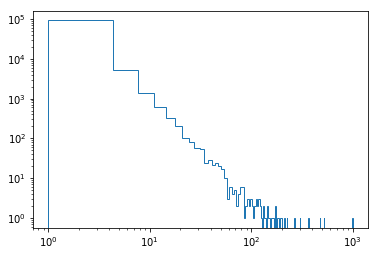

In [3]:
plt.hist(energies, bins = 300, histtype='step')
plt.xscale('log')
plt.yscale('log')

### b)

In [4]:
np.random.seed(43)
uniform_2 = np.random.uniform(0,1,100000)
acceptance = (1-np.exp(-energies/2))**3 

##### Neumannsches Rückweisungsverfahren:  
Die Akzeptanzen werden mit gleichverteilten Zufallszahlen zwischen 0 und 1 verglichen, daher kann zufällig entschieden werden, ob ein Ereignis detektiert wird.

In [5]:
detected = acceptance > uniform_2 #True False Werte
df_2 = pd.DataFrame(detected)
df_2.to_hdf('NeutrinoMC.hdf5', key='AcceptanceMask')
detectedEnergies = energies[detected] #Anzeigen der Energien, die zu den Akzeptanzen gehören

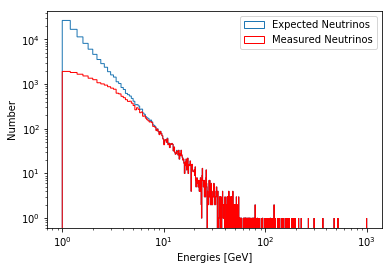

In [7]:
plt.hist(energies, bins=5000, label='Expected Neutrinos', histtype='step')
plt.hist(detectedEnergies, bins=5000, label='Measured Neutrinos', histtype='step', color='red')
plt.legend(loc='best')
plt.xlabel('Energies [GeV]')
plt.ylabel('Number')
plt.xscale('log')
plt.yscale('log')

### c)
Nun werden mithilfe der Polarmethode die Hits pro Event gezogen, sie folgen der Normalverteilung $N(10E, 2E).$
+ Erzeuge gleichverteilte Zahlen $u_1, u_2$ zwischen 0 und 1
+ Bilde $v_1 = 2u_1 -1, v_2 = 2u_2 -1$ (Quadrat um Ursprung)
+ Bestimme $s = v_1^2 + v_2^2$ und verwerfe $v_1$ und $v_2,$ falls $s\leq 1$. Gehe in diesem Fall zurück zum ersten Schritt
+ $ x_1 = v_1\sqrt{ -\frac{2\ln(s)}{s} }, \,\,x_2 = v_2\sqrt{ -\frac{2\ln(s)}{s} } $ sind nun unabhängige, standardnormalverteilte Zufallszahlen
+ Addiere den geforderten Mittelwert und multipliziere mit der Standardabweichung

In [8]:
np.random.seed(42)
v_1 = np.random.uniform(-1,1,100000)
v_2 = np.random.uniform(-1,1,100000)
s = v_1**2 + v_2**2

In [10]:
polarlist = []
u_short = []
i = 0
j = 0
while len(polarlist) < len(detectedEnergies):
    if s[i] != 0 and s[i] <=1:
        p = np.sqrt(-2*np.log(s[i])/s[i])
        if v_1[i] < 0:
            if p <= -10*np.sqrt(detectedEnergies[j])/(np.sqrt(2)*v_1[i]): #liefert nur positive Hits, falls u<0, sonst ist das trivialerweise erfüllt.
                polarlist.append(p)
                u_short.append(v_1[i])
                i += 1
                j += 1
            else:
                i += 1
        else:
            polarlist.append(p)
            u_short.append(v_1[i])
            i += 1
            j += 1
    else:
        i += 1

In [11]:
hits = np.sqrt(2*detectedEnergies)*u_short*polarlist + 10*detectedEnergies
Hits = np.round(hits, decimals=0)
df3 = pd.DataFrame(data = Hits)
df3.to_hdf('NeutrinoMC.hdf5', key='NumberOfHits')

6.0

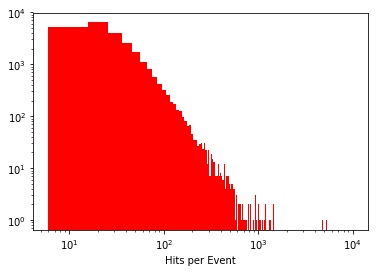

In [13]:
plt.hist(Hits, bins=1000, color = 'red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Hits per Event')
min(Hits)

### d)

In [14]:
x=[]
y=[]
for N in Hits:
    xloc = np.random.normal(loc=7, scale= 1/np.log10(N+1))
    yloc = np.random.normal(loc=3, scale= 1/np.log10(N+1))
    if xloc <= 10 and xloc >= 0:
        x.append(xloc)
    else:
        x.append(np.random.normal(loc=7, scale= 1/np.log10(N+1)))
    if yloc <= 10 and yloc >= 0:
        y.append(yloc)
    else:
        y.append(np.random.normal(loc=7, scale= 1/np.log10(N+1)))

Text(0, 0.5, 'y-coordinates [length units]')

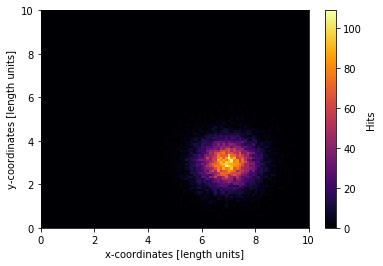

In [16]:
plt.hist2d(x,y,bins=100, range=[[0,10],[0,10]], cmap='inferno')
plt.colorbar().set_label('Hits')
plt.xlabel('x-coordinates [length units]')
plt.ylabel('y-coordinates [length units]')

### e)

In [17]:
BackgroundHitsrandoms = 10**np.random.normal(loc=2, scale=1, size=10**7)
BackgroundHits = np.round(BackgroundHitsrandoms, decimals = 0)

Text(0, 0.5, 'Number')

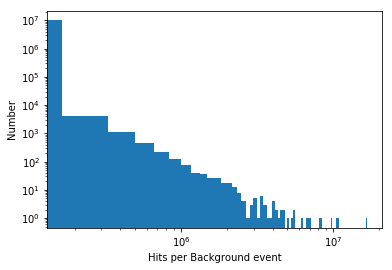

In [18]:
plt.hist(BackgroundHits, bins=100)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Hits per Background event')
plt.ylabel('Number')

In [21]:
dfbg = pd.DataFrame(data = BackgroundHits)
#dfbg.to_hdf('Background.hdf5', key='NumberOfHits')

xrandoms = np.random.normal(size=10**7)
yrandoms = np.random.normal(size=10**7)

Backgroundx = np.sqrt(0.75)*3*xrandoms + 0.5*3*yrandoms +5
Backgroundy = 3*yrandoms + 5
dfbgx = pd.DataFrame(data = Backgroundx)
#dfbgx.to_hdf('Background.hdf5', key='x')
dfbgy = pd.DataFrame(data = Backgroundy)
#dfbgy.to_hdf('Background.hdf5', key='y')

Text(0, 0.5, 'y-coordinates [length units]')

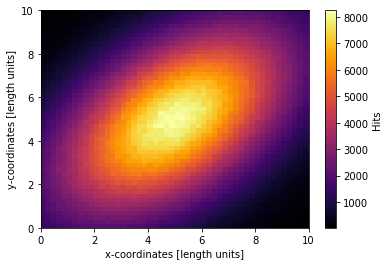

In [22]:
plt.hist2d(Backgroundx, Backgroundy, range=[[0,10],[0,10]], bins=50, cmap='inferno')
plt.colorbar().set_label('Hits')
plt.xlabel('x-coordinates [length units]')
plt.ylabel('y-coordinates [length units]')